# Demo2: Simple Harmonic Oscillator with RK2/RK4

In this jupyter notebook, we will learn how to use the Runge-Kutta 2/4 methods to solve for the motions of a simple harmonic oscillaotr.

&copy; Kuo-Chuan Pan, 2024\
For the course "Computational Physics" at NTHU

### Governing equations

The governing equations are 
$$
a^{t^n} = - \omega_0^2 x^{t^n},
$$

$$
\frac{dx}{dt} = v,
$$
and 
$$
\frac{dv}{dt} = a.
$$


### Runge-Jutta methods

Higher-order explicit schemes.

* RK2

$$
y_{k+1} = y_k + \frac{h_k}{2}(k_1 + k2),
$$
where $k_1 = f(t_k, y_k)$ and $k_2 = f(t_k+h_k, y_k + h_k k1)$.

* RK4

$$
y_{k+1} = y_k + \frac{h_k}{6}(k_1 +2k_2 +2k_3+k_4),
$$
where $k_1= f(t_k,y_k)$, $k_2=f(t_k+h_k/2, y_k + (h_k/2)k_1)$,
$k_3=f(t_k+h_k/2, y_k + (h_k/2)k_2)$, and $k_4=f(t_k+h_k, y_k+h_k k3)$.


### Initial Conditions

At time $t=0$, position $x=1$ and velocity $v=0$.\
Set $A=k=m=1$, and $\omega_0=\sqrt{k/m}=1$ as well.

## Exercie 1: Redo demo1 with the RK2 method
Use a small time step $\Delta t=0.01$ and solve for the solution at $t=20$.

In [1]:
# import required libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#
# This is a simple example of how to solve a simple harmonic oscillator using the RK2 method
#

# Step 1: set up the parameters of the problem
def RK2(A,k,m,dt):
    omega0 = np.sqrt(k/m)
    t=np.linspace(0,40,int(40/dt))
    x=np.zeros(len(t))
    v=np.zeros(len(t))
    a=np.zeros(len(t))
    x[0]=A
    v[0]=0
    a[0]=-k*x[0]/m
    for i in range(len(t)-1):
        ak1=-k*x[i]/m
        vk1=v[i]
        ak2=-k*(x[i]+vk1*dt)/m
        vk2=v[i]+ak1*dt
        v[i+1]=v[i]+(ak1+ak2)*dt*0.5
        x[i+1]=x[i]+(vk1+vk2)*dt*0.5
    return t,x,v




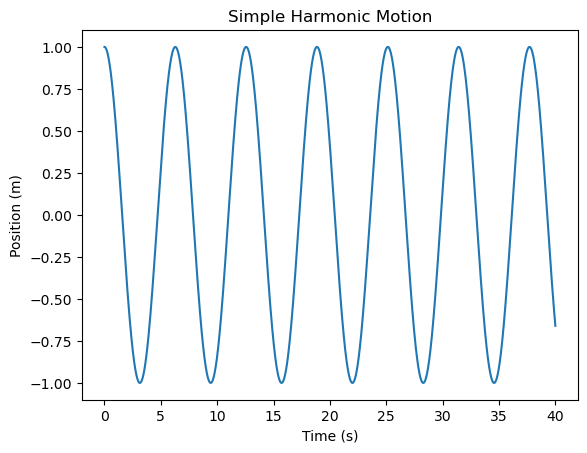

In [3]:
# Step 5: plot the solution
times,posx,velx = RK2(1,1,1,0.01)
plt.plot(times,posx)
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.title('Simple Harmonic Motion')
plt.show()

We could verify our numerical solution be comparing it with the analytical solutions.
The analytical solutions are:

$$
x = A \cos(\omega_0 t + \phi),
$$
and

$$
v = -A \omega_0 \sin(\omega_0 t + \delta).

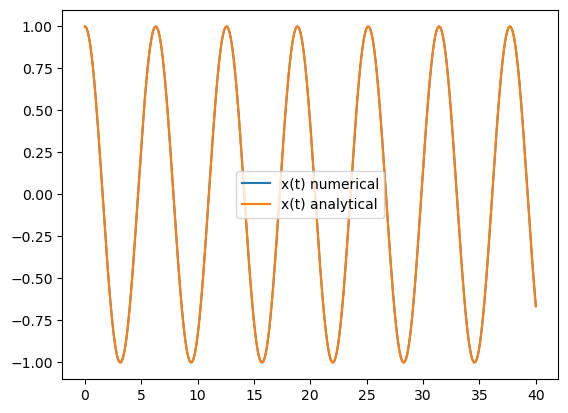

In [4]:
# Step 6: evaluate the analytical solution

# TODO:
A=1
k=1
m=1
omega0 = np.sqrt(k/m)
dt=0.01
t = np.linspace(0,40,1000)
times,posx,velx = RK2(A,k,m,dt)
plt.plot(times,posx,label='x(t) numerical')
plt.plot(t,A*np.cos(omega0*t),label='x(t) analytical')
plt.legend()



Another way to chekc the accuray of our numerical solution is to check the energy conservation and the phase-sapce diagram.

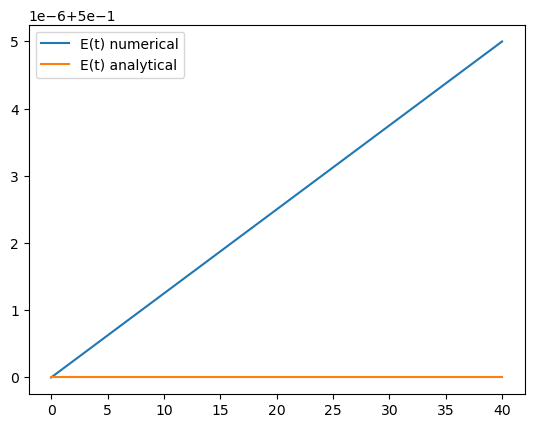

In [5]:
# Step 7: evaluate the energy (error) of the system

# TODO:
plt.plot(times,0.5*k*posx**2+0.5*m*velx**2,label='E(t) numerical')
plt.plot(t,0.5*k*A**2*np.cos(omega0*t)**2+0.5*m*(-A*omega0*np.sin(omega0*t))**2,label='E(t) analytical')
plt.legend()
plt.show()




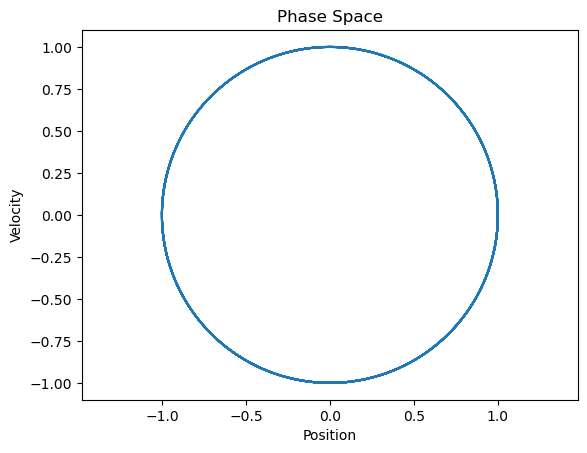

In [8]:
# Step 8: evaluate the phase space

# TODO:
plt.plot(posx,velx)
plt.xlabel('Position')
plt.ylabel('Velocity')
plt.title('Phase Space')
plt.axis('equal')
plt.show()






## Exercise 2: Repeat with RK4


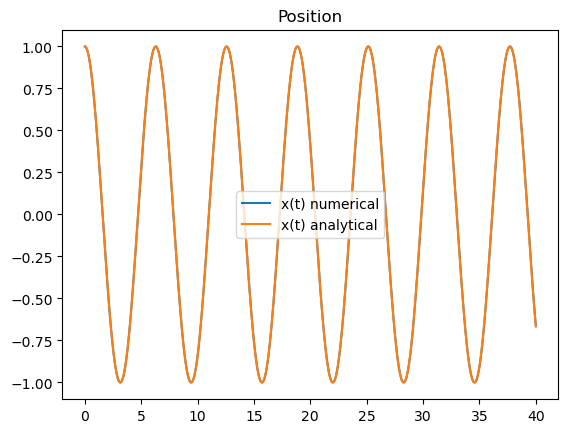

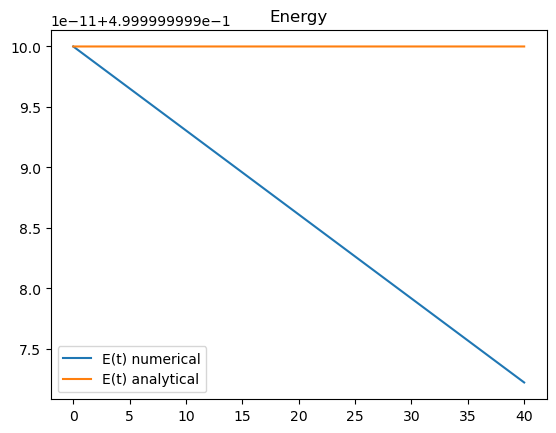

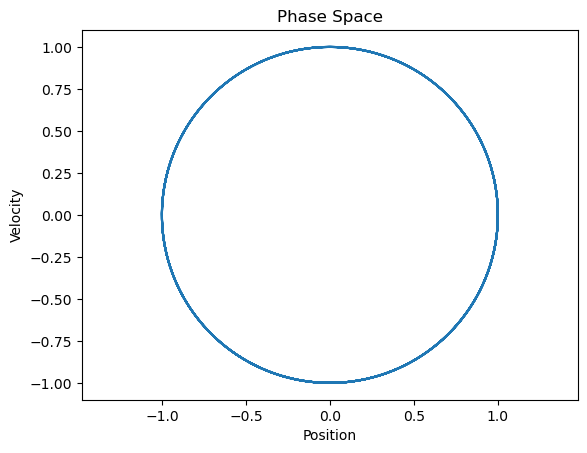

In [10]:
#
# This is a simple example of how to solve a simple harmonic oscillator using the RK4 method
#

# TODO:
def RK4(A,k,m,dt):
    omega0 = np.sqrt(k/m)
    t=np.linspace(0,40,int(40/dt))
    x=np.zeros(len(t))
    v=np.zeros(len(t))
    a=np.zeros(len(t))
    x[0]=A
    v[0]=0
    a[0]=-k*x[0]/m
    for i in range(len(t)-1):
        ak1=-k*x[i]/m
        vk1=v[i]
        ak2=-k*(x[i]+vk1*dt*0.5)/m
        vk2=v[i]+ak1*dt*0.5
        ak3=-k*(x[i]+vk2*dt*0.5)/m
        vk3=v[i]+ak2*dt*0.5
        ak4=-k*(x[i]+vk3*dt)/m
        vk4=v[i]+ak3*dt
        v[i+1]=v[i]+(ak1+2*ak2+2*ak3+ak4)*dt/6
        x[i+1]=x[i]+(vk1+2*vk2+2*vk3+vk4)*dt/6
    return t,x,v

A=1
k=1
m=1
omega0 = np.sqrt(k/m)
dt=0.01
t = np.linspace(0,40,1000)
times,posx,velx = RK4(A,k,m,dt)
plt.plot(times,posx,label='x(t) numerical')
plt.plot(t,A*np.cos(omega0*t),label='x(t) analytical')
plt.legend()
plt.title('Position')
plt.show()
plt.subplots()
plt.plot(times,0.5*k*posx**2+0.5*m*velx**2,label='E(t) numerical')
plt.plot(t,0.5*k*A**2*np.cos(omega0*t)**2+0.5*m*(A*omega0*np.sin(omega0*t))**2,label='E(t) analytical')
plt.legend()
plt.title('Energy')
plt.show()
plt.subplots()
plt.plot(posx,velx)
plt.xlabel('Position')
plt.ylabel('Velocity')
plt.title('Phase Space')
plt.axis('equal')
plt.show()








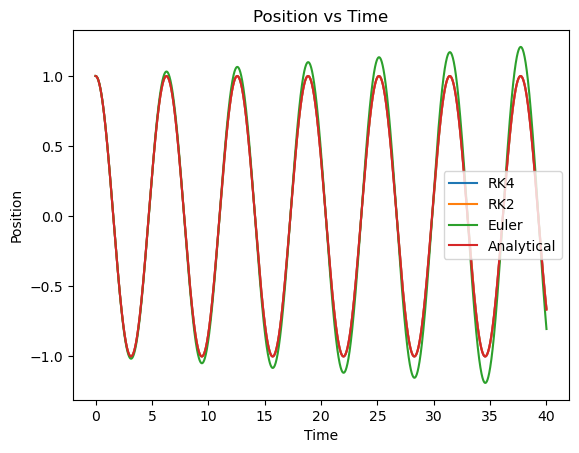

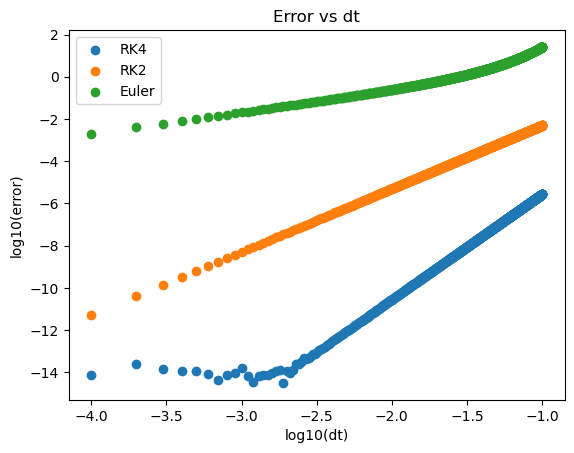

In [27]:
import numpy as np

def RK2(A,k,m,dt):
    def f(x,v):
        return v, -k*x/m
    t=np.linspace(0,40,int(40/dt))
    y=[np.zeros(len(t)), np.zeros(len(t))]
    y[0][0]=A
    y[1][0]=0
    for i in range(len(t)-1):
        k1=f(y[0][i],y[1][i])
        k2=f(y[0][i]+dt*k1[0],y[1][i]+dt*k1[1])
        y[0][i+1]=y[0][i]+dt*(k2[0]+k1[0])/2    
        y[1][i+1]=y[1][i]+dt*(k2[1]+k1[1])/2

    return y[0],y[1],t

def euler(A,k,m,dt):
    def f(x,v):
        return v, -k*x/m
    t=np.linspace(0,40,int(40/dt))
    y=[np.zeros(len(t)), np.zeros(len(t))]
    y[0][0]=A
    y[1][0]=0
    for i in range(len(t)-1):
        k1=f(y[0][i],y[1][i])
        y[0][i+1]=y[0][i]+dt*k1[0]
        y[1][i+1]=y[1][i]+dt*k1[1]
    return y[0],y[1],t

def RK4(A,k,m,dt):
    def f(x,v):
        return v, -k*x/m
    t=np.linspace(0,40,int(40/dt))
    y=[np.zeros(len(t)), np.zeros(len(t))]
    y[0][0]=A
    y[1][0]=0
    for i in range(len(t)-1):
        k1=f(y[0][i],y[1][i])
        k2=f(y[0][i]+dt*k1[0]*0.5,y[1][i]+dt*k1[1]*0.5)
        k3=f(y[0][i]+dt*k2[0]*0.5,y[1][i]+dt*k2[1]*0.5)
        k4=f(y[0][i]+dt*k3[0],y[1][i]+dt*k3[1])
        y[0][i+1]=y[0][i]+dt*(k1[0]+2*k2[0]+2*k3[0]+k4[0])/6
        y[1][i+1]=y[1][i]+dt*(k1[1]+2*k2[1]+2*k3[1]+k4[1])/6
    return y[0],y[1],t

A=1
k=1
m=1
dt=np.linspace(0.0001,0.1,1000)
deltaE=np.zeros(len(dt))
i=0
deltaE1=np.zeros(len(dt))
deltaE=np.zeros(len(dt))
deltaE2=np.zeros(len(dt))
for ddt in dt:
    x,v,t=RK4(A,k,m,ddt)
    x1,v1,t1=RK2(A,k,m,ddt)
    x2,v2,t2=euler(A,k,m,ddt)
    delta=0.5*m*v**2+0.5*k*x**2-0.5*k*A**2
    delta1=0.5*m*v1**2+0.5*k*x1**2-0.5*k*A**2
    delta2=0.5*m*v2**2+0.5*k*x2**2-0.5*k*A**2
    deltaE[i]=max(abs(delta))
    deltaE1[i]=max(abs(delta1))
    deltaE2[i]=max(abs(delta2))
    i+=1

ddt=0.01
x,v,t=RK4(A,k,m,ddt)
x1,v1,t1=RK2(A,k,m,ddt)
x2,v2,t2=euler(A,k,m,ddt)
plt.plot(t,x,label='RK4')
plt.plot(t1,x1,label='RK2')
plt.plot(t2,x2,label='Euler')
plt.plot(t,A*np.cos(np.sqrt(k/m)*t),label='Analytical')
plt.xlabel('Time')
plt.ylabel('Position')
plt.title('Position vs Time')
plt.legend()
plt.show()
plt.subplots()
plt.scatter(np.log10(dt),np.log10(deltaE),label='RK4')
plt.scatter(np.log10(dt),np.log10(deltaE1),label='RK2')
plt.scatter(np.log10(dt),np.log10(deltaE2),label='Euler')
plt.xlabel('log10(dt)')
plt.ylabel('log10(error)')
plt.title('Error vs dt')
plt.legend()
